# Homework #4 Part I: Fit this model using HMC in `PyMC`

For the model specification example considered in "Metropolis within Gibbs" above...


## Provide posterior analysis for this model using "default" `PyMC`
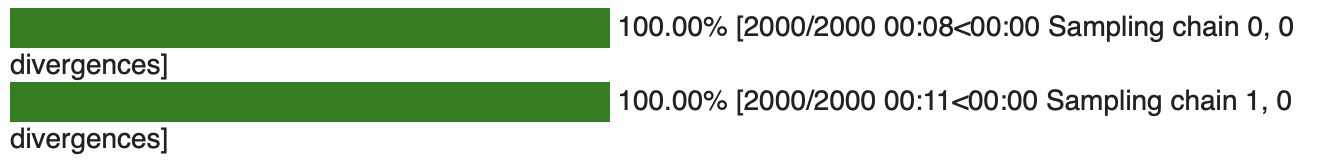
- ***Explore and describe the sample sizes needed to support inference regarding the `df` parameter $(\nu)$***


/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)
/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


Effective sample size for df    156.5
Name: ess_bulk, dtype: float64


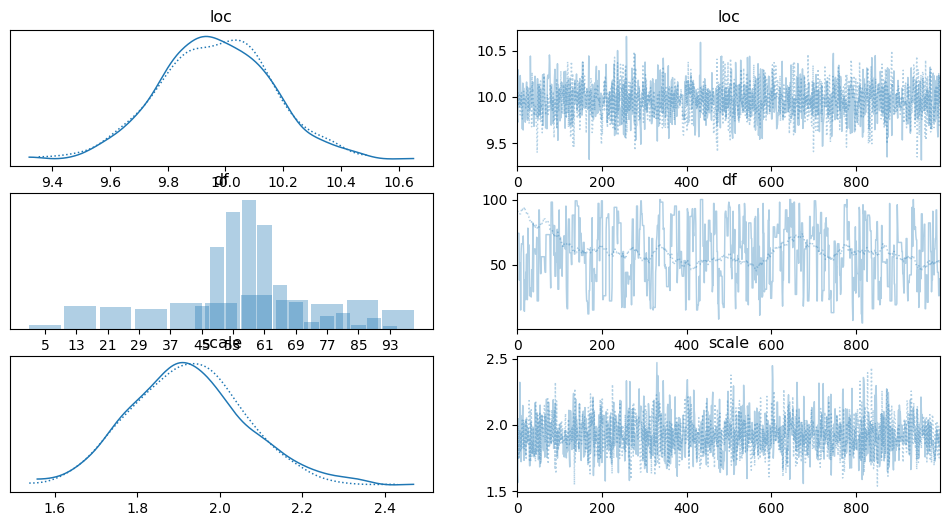

In [3]:
#First, I will begin with sample size n=100
import pymc as pm
import arviz as az
from scipy import stats; import numpy as np; import matplotlib.pyplot as plt
mu_0,sigma_0=0,10
n,loc_true,scale_true,df_true = 100,10,2,15 #unknown true probability
x = stats.t(df=df_true, loc=loc_true, scale=scale_true).rvs(n) # Generate actual data
#Fit this model using HMC in PyMC
t_normal_HalfNormal_DiscreteUniform_model = pm.Model()
with t_normal_HalfNormal_DiscreteUniform_model:
    loc = pm.Normal('loc', mu=mu_0, sigma=sigma_0)
    scale = pm.HalfNormal('scale', sigma=5)
    df = pm.DiscreteUniform('df', lower=1, upper=100)
    # Priors

    x_obs = pm.StudentT('Likelihood', mu=loc, lam=1/scale**2, nu=df, observed=x)
    # Likelihood

with t_normal_HalfNormal_DiscreteUniform_model:
    idata = pm.sample()
    # Posterior sampling using "default" PyMC sampler

az.plot_trace(idata)
# Analyze the posterior samples
#My true degree of freedom is 15
#Here, my posterior ingerence on my degree of freedom doesn't look right at all




Here, our posterior inference on the parameter degree of freedom doesn't seem right at all. Our true degree of freedom is 15, while our inference is suggesting all sort of different values that are "far away" from our true parameter value.

Now, Let's explore on the sample size and see under what sample size are we going to start getting a legitemate inference on the parameter degree of freedom.

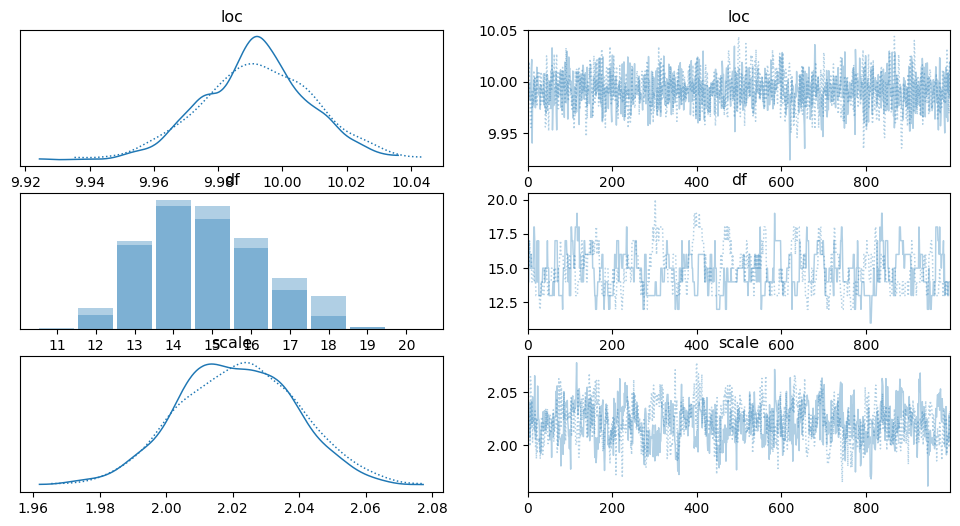

In [4]:
#We will increase the sample size to 15000
#Repeat the step above (with n now equals to 15000)
n1,loc_true,scale_true,df_true = 15000,10,2,15 # True values data
x1 = stats.t(df = df_true, loc = loc_true, scale = scale_true).rvs(n1)

with pm.Model() as t_norm_half_norm_discrete:
    loc = pm.Normal("loc", mu=0, sigma=10)
    scale = pm.HalfNormal("scale", sigma=5)
    df = pm.DiscreteUniform("df", lower=1,upper=100)
    x_obs = pm.StudentT("likelihood", mu=loc, sigma=scale, nu=df, observed=x1)
    idata1 = pm.sample()
import arviz as az;
az.plot_trace(idata1);

Now, with sample size = 15000, I'm starting to get useful inference on what is the actual degree of freedom parameter.

# Homework #4 Part II: HMC Diagnostics

- Return to your posterior analysis in "Homework #4 Part I" and
report on (a) ***effective sample sizes***; (b) ***chain convergence measures***; (c) ***divergences***; (d) ***Metropolis-Hastings acceptance rates*** [see below for how to access these]; and (e) any other warnings or concerns provided by `PyMC`

In [21]:
import pandas as pd
az.summary(idata1, round_to=2)
# a. Effective sample size for the df parameter
df_summary = az.summary(idata, var_names=['df'], round_to=2)
df_summary2 = az.summary(idata, var_names=['loc'], round_to=2)
df_summary3 = az.summary(idata, var_names=['scale'], round_to=2)
df_ess = df_summary['ess_bulk']
df_ess2 = df_summary2['ess_bulk']
df_ess3 = df_summary3['ess_bulk']
print("Effective sample size for "+str(df_ess))
print("Effective sample size for "+str(df_ess2))
print("Effective sample size for "+str(df_ess3))
# b. chain convergence measures
print("HMC Split-Rhats", {k: np.round(v.values,4) for k,v in az.rhat(idata1).items()});
#with split- Rhats ≤1.05  suggesting Markov chain convergence to its stationary distributio

Effective sample size for df    156.5
Name: ess_bulk, dtype: float64
Effective sample size for loc    2033.46
Name: ess_bulk, dtype: float64
Effective sample size for scale    1861.58
Name: ess_bulk, dtype: float64
HMC Split-Rhats {'loc': 1.0056, 'df': 1.0083, 'scale': 1.0065}


- We see that our effective sample size for the parameter df is 156.5,for loc is 2033.46 and for scale is 1861.58.
- Our split -Rhat value for each parameter are {'loc': 1.0056, 'df': 1.0083, 'scale': 1.0065}, with split- Rhats ≤1.05  suggesting Markov chain convergence to its stationary distribution
- Our divergence is 0
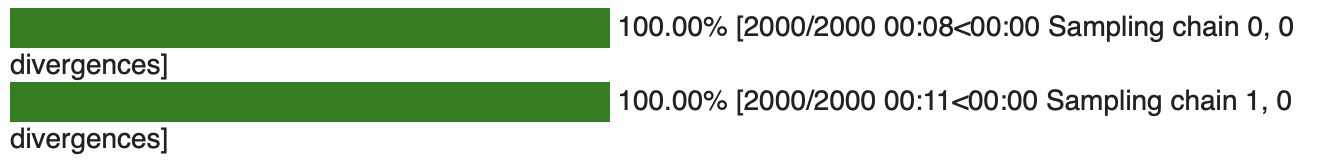

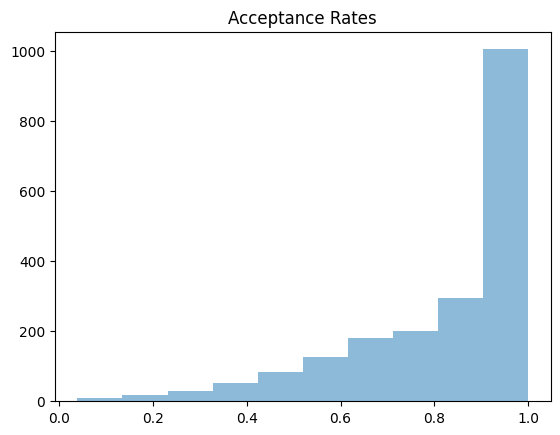

In [20]:
#d) Metropolis-Hastings acceptance rates
import matplotlib.pyplot as plt
plt.hist(idata1.sample_stats.acceptance_rate.values.flatten(), alpha=0.5, label='center');
plt.title('Acceptance Rates');

- Now examine the [Eight Schools](https://github.com/pointOfive/STA410_W24_StatisticalComputation/blob/main/Week3/STA410_W24_Week3_Demo_HMCwithPyMC.ipynb) example PyMC model and outputted results
    - Provide an analogous report regarding (a)-(e) above for the "centered" and "uncentered" Eight Schools models
        - *Hint: for (d) see `fit_C.sample_stats.acceptance_rate.values.flatten()` and `fit_NC.sample_stats.acceptance_rate.values.flatten()` and in the Eight Schools example*
  

In [22]:
import numpy as np
J = 8
y = np.array([28.0, 8.0, -3.0, 7.0, -1.0, 1.0, 18.0, 12.0])
sigma = np.array([15.0, 10.0, 16.0, 11.0, 9.0, 11.0, 10.0, 18.0])

with pm.Model() as Centered_eight:

    # We assume the following prior distributions for our parameters
    mu = pm.Normal("mu", mu=0, sigma=5)
    tau = pm.HalfCauchy("tau", beta=5)

    # and we assume the following probabilistic hierarchy
    # within the data generating mechanism
    theta = pm.Normal("theta", mu=mu, sigma=tau, shape=J) # theta is length J=8

    # Note that if tau was small, then the density evalution above
    # could change rapidly for changes in theta
    # This means that the energy has high curvature

    # likelihood where observed information enters into the model
    obs = pm.Normal("obs", mu=theta, sigma=sigma, observed=y)
# This posterior distribution implied by this specification can be sampled from
# using HMC where the necessary auxiliary variables are added "under the hood"
SEED = [20100420, 20134234] # random seeds for each of two run HMC chains
with Centered_eight:
    fit_C = pm.sample(5000, chains=2, tune=1000, random_seed=SEED,
                      return_inferencedata=True, idata_kwargs={"log_likelihood": True})

with pm.Model() as NonCentered_eight:
    mu = pm.Normal("mu", mu=0, sigma=5)
    tau = pm.HalfCauchy("tau", beta=5)
    theta_tilde = pm.Normal("theta_t", mu=0, sigma=1, shape=J)

    theta = pm.Deterministic("theta", mu + tau * theta_tilde)
    obs = pm.Normal("obs", mu=theta, sigma=sigma, observed=y)


with NonCentered_eight:
    fit_NC = pm.sample(5000, chains=2, tune=1000, random_seed=SEED,
                       return_inferencedata=True, idata_kwargs={"log_likelihood": True})

In [28]:
#a) effective sample sizes
import pandas as pd
print("Effective Sample Sizes (function of Markov Chain autocorrelation dependency)")
pd.concat(
[pd.DataFrame({'Centered': pm.summary(fit_C)[:1]['ess_bulk'],
              'Non-Centered': pm.summary(fit_NC)['ess_bulk'][:1]}),
 pd.DataFrame({'Centered': pm.summary(fit_C)[1:]['ess_bulk'],
              'Non-Centered': pm.summary(fit_NC)['ess_bulk'][9:]})])


Effective Sample Sizes (function of Markov Chain autocorrelation dependency)


,Centered,Non-Centered
mu,623.0,11120.0
tau,129.0,5121.0
theta[0],538.0,10859.0
theta[1],978.0,11965.0
theta[2],1575.0,11071.0
theta[3],965.0,12523.0
theta[4],1673.0,11294.0
theta[5],1769.0,10616.0
theta[6],415.0,11073.0
theta[7],1248.0,11415.0


In [30]:
#b) chain convergence measurement
print("Split-Rhats for center", {k: np.round(v.values,4) for k,v in az.rhat(fit_C).items()}, end=' | '); print('Split-Rhats for non-center',{k: np.round(v.values,4) for k,v in az.rhat(fit_NC).items()})

Split-Rhats for center {'mu': 1.0055, 'theta': array([1.0065, 1.0039, 1.0032, 1.0046, 1.0017, 1.0035, 1.006 , 1.0024]), 'tau': 1.0226} | Split-Rhats for non-center {'mu': 1.0001, 'theta_t': array([1.0001, 1.0002, 1.    , 0.9999, 1.0002, 1.    , 1.0001, 1.0016]), 'tau': 1.0001, 'theta': array([1.0002, 1.0002, 1.    , 1.0006, 1.0007, 0.9999, 0.9999, 1.    ])}


Our split -Rhat values ≤1.05 suggesting Markov chain convergence to its stationary distribution

c) divergence
- for Centered: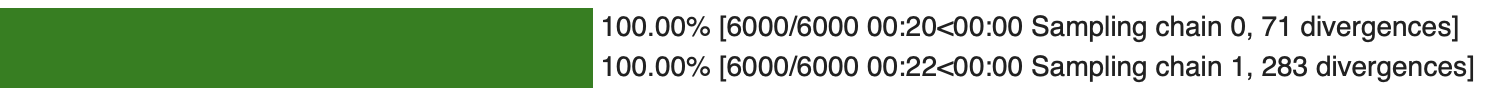
- For Non-Centered:
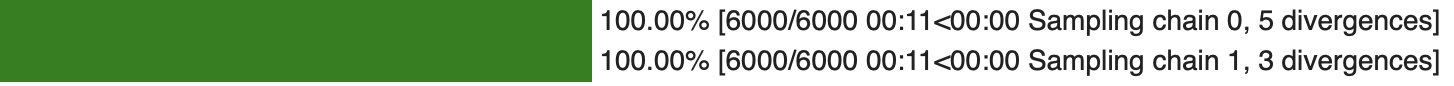

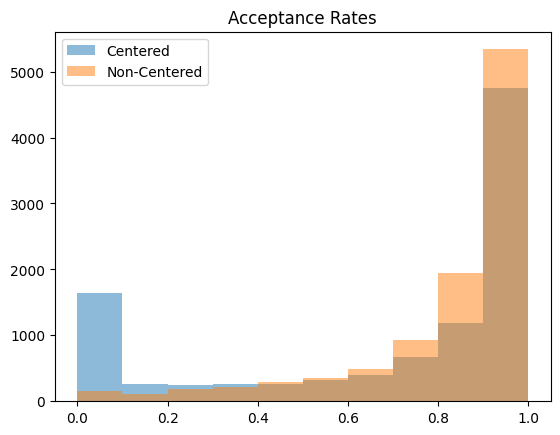

In [40]:
#d) acceptance rate
import matplotlib.pyplot as plt
plt.hist(fit_C.sample_stats.acceptance_rate.values.flatten(), alpha=0.5,
         label='Centered');
plt.hist(fit_NC.sample_stats.acceptance_rate.values.flatten(), alpha=0.5,
         label='Non-Centered');
plt.title('Acceptance Rates'); plt.legend();

  - From the perspective of ***curvature*** of the ***energy function*** (that is, how rapidly the ***log joint posterior distribution density*** changes for different values of its ***random variable (parameters)*** and the effectiveness of the ***HMC*** algorithm, explain why the "uncentered" paramterization of the model performs better than the "centered" parameterization


1. In the "non-centered" parameterization, we have a fewer divergence compared to the "Centered" parameterization (divergence is caused by excessive curvature in the energy function).  
2. The Metropolis-Hastings acceptance rates is better for the "non-centered" parameterization compared to the "centered" paramterization (divergence in "centered" => low Metroplis-Hastings acceptance rates).


We know that HMC is most costly for high divergence (posterior distributions with excessive curvature) and low Metropolis-Hastings acceptance.
Then, in this case the "uncentered" paramterization of the model performs better than the "centered" parameterization as it has fewer divergences and better Metropolis-Hastings acceptance rate (Higher cost will result in HMC algorithim being more inefficient).

- Review [this](https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/pymc_overview.html#model-checking) and [that](https://discourse.pymc.io/t/about-nuts-sampling-and-energy-plot/831) discussing the ***diagnostic plot*** which compares the ***observed energy proposal distribution*** versus the ***empirical energy distribution*** of the generated HMC samples   
 - Use the code on the next slide to provide and interpret the ***diagnostic plot*** assessing ***energy proposals*** versus the empirical ***energy*** distribution to compare and contrast the "centered" and "uncentered" Eight Schools models in relation to you previous comparision of these two model parameterization in terms of ***energy function curvature*** and the effectiveness of the ***HMC*** algorithm... does this diagnostic support your previous conclusions in these regards?

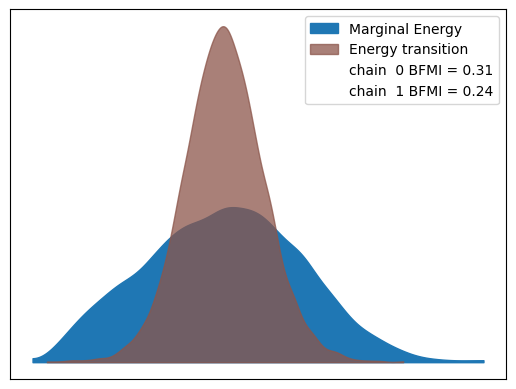

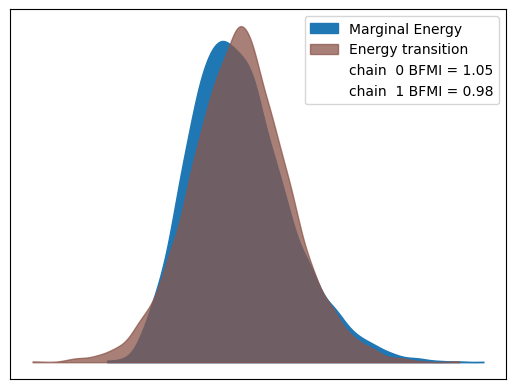

In [32]:
import arviz as az
az.plot_energy(fit_C);
az.plot_energy(fit_NC);

The BFMI is low for both chains (0.31 and 0.24) in the "centered" parameterization, which means that the energy distribution of the transitions does not match the marginal energy distribution well. This indicates that the "centered" parameterization might be causing the HMC algorithm to perform effectively.

The BFMI values are close to 1 (1.05 and 0.98), indicating better match between the energy transition and the marginal energy distribution. This implies that the "uncentered" model leads to a more efficient exploration of the posterior distribution by the HMC sampler and is consistent with expectations that "uncentering" can alleviate issues related to the curvature of the energy function.

The diagnostic supports the conclusion the "uncentered" paramterization of the model performs better than the "centered" parameterization. This is evident from the higher BFMI values and the better overlap between the energy transition and marginal energy distributions in the "uncentered" model compared to the "centered" model.